# Example: N-Ary Recombining Lattice Models
Fill me in.

___

## Setup, Data, and Prerequisites
First, we set up the computational environment by including the `Include.jl` file and loading any needed resources.

>__Include:__ The [`include(...)` command](https://docs.julialang.org/en/v1/base/base/#include) evaluates the contents of the input source file, `Include.jl`, in the notebook's global scope. The `Include.jl` file sets paths, loads required external packages, etc. For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/). 

Let's set up our code environment:

In [1]:
include(joinpath(@__DIR__, "Include.jl")); # include the Include.jl file

For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl). 

### Data
We gathered daily open-high-low-close (OHLC) data for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) from `01-03-2014` until `12-31-2024`, along with data for a few exchange-traded funds and volatility products during that time period. 

Let's load the `original_dataset::DataFrame` by calling [the `MyTrainingMarketDataSet()` function](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/data/#VLQuantitativeFinancePackage.MyTrainingMarketDataSet) and remove firms that do not have the maximum number of trading days. The cleaned dataset $\mathcal{D}$ will be stored in the `dataset` variable.

In [2]:
original_dataset = MyTrainingMarketDataSet() |> x-> x["dataset"];

Not all tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquisition or delisting events. Let's collect only those tickers with the maximum number of trading days.

First, let's compute the number of records for a firm that we know has the maximum value, e.g., `AAPL`, and save that value in the `maximum_number_trading_days::Int64` variable:

In [3]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow # nrow? (check out: DataFrames.jl)

2767

Now, let's iterate through our data and collect only tickers with `maximum_number_trading_days` records. We'll save that data in the `dataset::Dict{String,DataFrame}` variable:

In [4]:
dataset = let

    # initialize -
    dataset = Dict{String, DataFrame}();

    # iterate through the dictionary; we can't guarantee a particular order
    for (ticker, data) ∈ original_dataset  # we get each (K, V) pair!
        if (nrow(data) == maximum_number_trading_days) # what is this doing?
            dataset[ticker] = data;
        end
    end
    dataset; # return
end;

Finally, let's get a list of the firms in our cleaned dataset and sort them alphabetically. We store the sorted firm ticker symbols in the `list_of_tickers::Array{String,1}` variable.

In [5]:
list_of_tickers = keys(dataset) |> collect |> sort # list of firm "ticker" symbols in alphabetical order

424-element Vector{String}:
 "A"
 "AAL"
 "AAP"
 "AAPL"
 "ABBV"
 "ABT"
 "ACN"
 "ADBE"
 "ADI"
 "ADM"
 ⋮
 "WYNN"
 "XEL"
 "XOM"
 "XRAY"
 "XYL"
 "YUM"
 "ZBRA"
 "ZION"
 "ZTS"

### Constants
Finally, let's set some constants we'll use later in this notebook. The comments describe the constants, their units, and permissible values.

In [ ]:
TSIM = 8; # number of trading days to simulate
Δt = (1.0/252); # step size: 1 trading day in units of years
r̄ = 0.05; # risk-free rate (annualized)
n = 3; # number of branches in the N-ary lattice

Fill me in.

In [7]:
nodes_at_level(i::Integer, n::Integer) = binomial(i + n - 1, i)
level_offset(i::Integer, n::Integer) = i == 0 ? 0 : binomial(i + n - 1, i - 1) # start of level i

level_offset (generic function with 1 method)

___

## Task 1: Compute lattice parameters and future prices from historical data
Fill me in.

In [8]:
# random_firm_ticker = rand(list_of_tickers);
random_firm_ticker = "AAPL"
random_firm_index = findfirst(x-> x == random_firm_ticker, list_of_tickers);
random_firm_data = dataset[random_firm_ticker];


Next, we randomly specify the `start_index` as the trading day index in the dataset, which will serve as the tree's starting point or `L = 0`. Finally, we set the variable `Sₒ`, which corresponds to the initial price per share at the root of the tree; we use the [volume-weighted average price (VWAP)](https://en.wikipedia.org/wiki/Volume-weighted_average_price) as the initial condition:

In [9]:
start_index = rand(1:(maximum_number_trading_days - TSIM - 1))
stop_index = start_index + TSIM
println("Visualize Firm-$(random_firm_index) between trading days ($(start_index) -> $(stop_index))")

Visualize Firm-4 between trading days (1135 -> 1143)


Fill me in

In [10]:
log_growth_array = log_growth_matrix(dataset, random_firm_ticker) # array holding growth rate time series

2766-element Vector{Float64}:
 -1.9954223478275546
  0.15124876922831154
  0.9224750663536962
 -1.4261203338251638
 -3.0008957287125435
  1.5049147899343094
  2.9156076155145367
  6.502627170431676
 -1.2561327051214097
 -4.024741418592851
  ⋮
 -2.325529514930973
 -0.7888121514647656
  3.27667430452004
  1.6089944655721826
  2.6547619721872575
  1.4556917537856608
 -3.6286559032528003
 -2.934268163874707
 -1.5398398549769603

In [11]:
result = build_nary_lattice_from_growth_rate(log_growth_array; n = n, dt = Δt, method = :quantile);

In [12]:
typeof(result) |> T-> fieldnames(T) # check out the fields of the returned struct

(:edges, :avg_factor, :freq, :counts, :labels, :method, :dt, :N)

In [13]:
result.avg_factor

2-element Vector{Float64}:
 0.9904558965137503
 1.0116107772330392

Fill me in.

In [14]:
result.freq

2-element Vector{Float64}:
 0.5
 0.5

In [15]:
print_lattice(result)

n-ary lattice (method=quantile, Δt=0.003968253968253968, N=2766)
State μ-bin [low, high)               avg factor    freq      count
S1    [-21.211458 , 0.317856)         0.990456      0.5       1383
S2    [0.317856 , 21.706078]          1.011611      0.5       1383


Fill me in.

In [16]:
my_nary_lattice_model = let

    # initialize -
    model = nothing;
    Sₒ = random_firm_data[start_index,:volume_weighted_average_price];
    Δ = result.avg_factor |> reverse; # average growth factors (up to down)

    # build an empty model -
    model = build(MyGeneralAdjacencyRecombiningCommodityPriceTree, (
        n = n,
        h = TSIM, # how many days to simulate 
    ));

    # populate the data in the model -
    model = populate(model, Sₒ, Δ);

    # print -
    println("Starting price: $(Sₒ) USD for firm $(random_firm_ticker)");

    model; # return
end;

Starting price: 46.8394 USD for firm AAPL


What's in the `my_nary_lattice_model::MyGeneralAdjacencyRecombiningCommodityPriceTree` instance?

In [17]:
typeof(my_nary_lattice_model) |> T-> fieldnames(T) # check out the fields of the returned struct

(:data, :connectivity, :h, :n)

In [18]:
my_nary_lattice_model.connectivity

Dict{Int64, Vector{Int64}} with 45 entries:
  5  => [8, 9]
  35 => [43, 44]
  30 => [38, 39]
  32 => [40, 41]
  6  => [10, 11]
  4  => [7, 8]
  13 => [18, 19]
  12 => [17, 18]
  28 => [36, 37]
  23 => [30, 31]
  41 => [50, 51]
  43 => [52, 53]
  11 => [16, 17]
  36 => [45, 46]
  39 => [48, 49]
  7  => [11, 12]
  25 => [32, 33]
  34 => [42, 43]
  2  => [4, 5]
  ⋮  => ⋮

In [19]:
my_nary_lattice_model.data

Dict{Int64, NamedTuple} with 45 entries:
  5  => (price = 45.9496, path = [0, 2])
  35 => (price = 43.7983, path = [0, 7])
  30 => (price = 48.6798, path = [5, 2])
  32 => (price = 46.6651, path = [3, 4])
  6  => (price = 48.4899, path = [3, 0])
  4  => (price = 46.931, path = [1, 1])
  13 => (price = 46.0395, path = [1, 3])
  12 => (price = 47.0228, path = [2, 2])
  28 => (price = 50.7815, path = [7, 0])
  23 => (price = 48.1211, path = [4, 2])
  41 => (price = 46.2197, path = [3, 5])
  43 => (price = 44.3068, path = [1, 7])
  11 => (price = 48.0271, path = [3, 1])
  36 => (price = 51.3711, path = [8, 0])
  39 => (price = 48.2152, path = [5, 3])
  7  => (price = 47.4759, path = [2, 1])
  25 => (price = 46.1295, path = [2, 4])
  34 => (price = 44.7338, path = [1, 6])
  2  => (price = 46.3924, path = [0, 1])
  ⋮  => ⋮

## Task 2: Let's compute the probability of each price path
Fill me in.

In [20]:
nodes_at_tree_level = let

    # initialize -
    l = 8; # level
    start = level_offset(l, n);
    stop = start + nodes_at_level(l, n) - 1;

    # compute the nodes indices at level l -
    nodes = range(start, stop=stop, step=1) |> collect;
end

9-element Vector{Int64}:
 36
 37
 38
 39
 40
 41
 42
 43
 44

In [21]:
data_array_at_level = let
   
    # initialize -
    n = TSIM;
    number_of_nodes = length(nodes_at_tree_level);
    results_array = Array{Float64, 2}(undef, number_of_nodes, 2);
    Δ = result.avg_factor |> reverse; # average growth factors (up to down)
    p = result.freq |> reverse; # real-world probabilities (up to down)
    d = Multinomial(n, p)

    for i ∈ 1:number_of_nodes
        
        # get node index -
        j = nodes_at_tree_level[i];
        nodemodel = my_nary_lattice_model.data[j];

        # get the price from the node model -
        price = nodemodel.price;

        # ok: let's compute the probability of reaching this node -
        path = nodemodel.path; # path to reach this node
       
        # capture the results -
        results_array[i, 1] = price;
        results_array[i, 2] = pdf(d,path);
    end

    tmp = results_array[:,1];
    sorted_results_array = sortperm(tmp) |> I-> results_array[I, :]; # sort by price
end

9×2 Matrix{Float64}:
 43.3803  0.00390625
 44.3068  0.03125
 45.2532  0.109375
 46.2197  0.21875
 47.2069  0.273438
 48.2152  0.21875
 49.245   0.109375
 50.2968  0.03125
 51.3711  0.00390625

__Check:__ The sum of the probabilities at each level should equal `1.0`. Let's check that for level `l = 3` (the close price on Friday from today's perspective):

In [22]:
@assert data_array_at_level[:,2] |> sum ≈ 1.0 # should be 1.0

Let's visualize the possible price distribution for Friday:

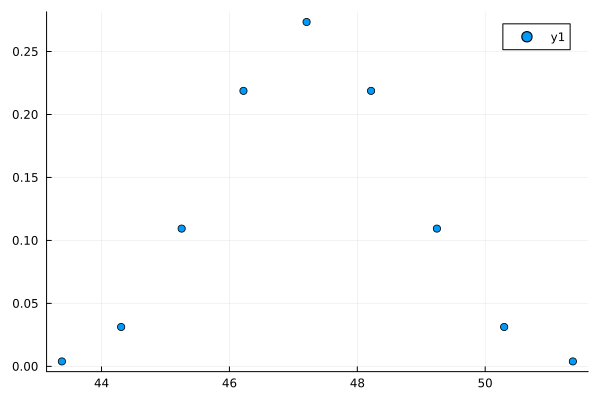

In [23]:
let

   density(data_array_at_level[:,1])
   scatter(data_array_at_level[:,1], data_array_at_level[:,2])
    

end

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products, or any investment or trading advice or strategy, is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance. Only risk capital that is not required for living expenses should be used.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.